In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, r2_score
import joblib

In [5]:
dataset_train = pd.read_csv("/home/tintin/Study/Data-Science/Statistical-Machine-Learning/Learn-K-Nearest-Neighbors/Datasets/Social_Network_Ads_Train.csv")
dataset_test = pd.read_csv("/home/tintin/Study/Data-Science/Statistical-Machine-Learning/Learn-K-Nearest-Neighbors/Datasets/Social_Network_Ads_Test.csv")
dataset_train

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,Purchased
0,0,15624510,Male,19,19000,0
1,1,15810944,Male,35,20000,0
2,2,15668575,Female,26,43000,0
3,3,15603246,Female,27,57000,0
4,4,15804002,Male,19,76000,0
...,...,...,...,...,...,...
295,295,15725794,Female,36,63000,0
296,296,15673539,Male,42,73000,1
297,297,15705298,Female,43,112000,1
298,298,15675791,Male,45,79000,0


In [6]:
X_train = dataset_train.iloc[:,[3,4]].values
Y_train = dataset_train.iloc[:,5].values
X_test = dataset_test.iloc[:,[3,4]].values
Y_test = dataset_test.iloc[:,5].values

In [16]:
print(X_train.shape,Y_train.shape)

(300, 2) (300,)


In [7]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [8]:
def VisualizingDataset(X_,Y_):
    X1 = X_[:,0]
    X2 = X_[:,1]
    for i, label in enumerate(np.unique(Y_)):
        plt.scatter(X1[Y_==label], X2[Y_ == label], color = ListedColormap(("red","green"))(i))

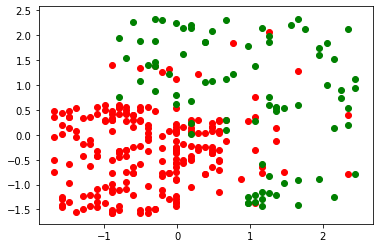

In [9]:
VisualizingDataset(X_train, Y_train)
plt.show()

In [10]:
def VisualizingResult(model, X_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    X1_range = np.arange(start= X1.min()-1, stop= X1.max()+1, step = 0.01)
    X2_range = np.arange(start= X2.min()-1, stop= X2.max()+1, step = 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid= np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    Y_grid= model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, Y_grid, alpha = 0.5,
    cmap = ListedColormap(("red", "green")))

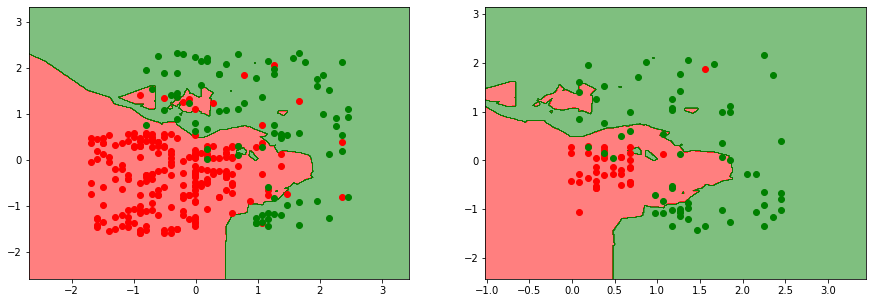

[[207  12]
 [ 10  71]]
[[37  1]
 [14 48]]


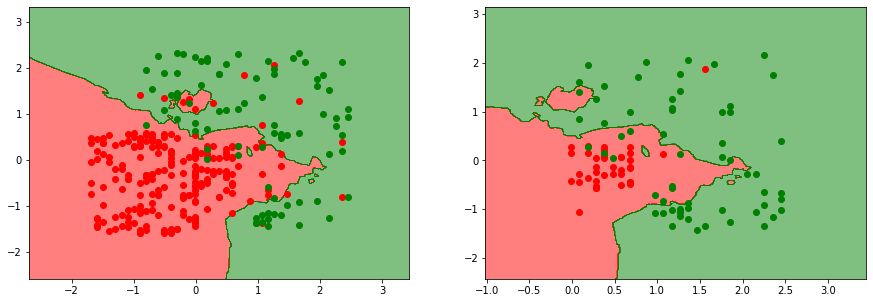

[[205  14]
 [  9  72]]
[[37  1]
 [12 50]]


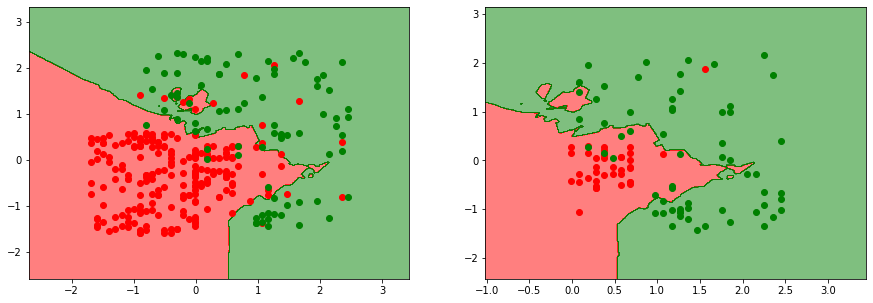

[[205  14]
 [ 11  70]]
[[37  1]
 [10 52]]


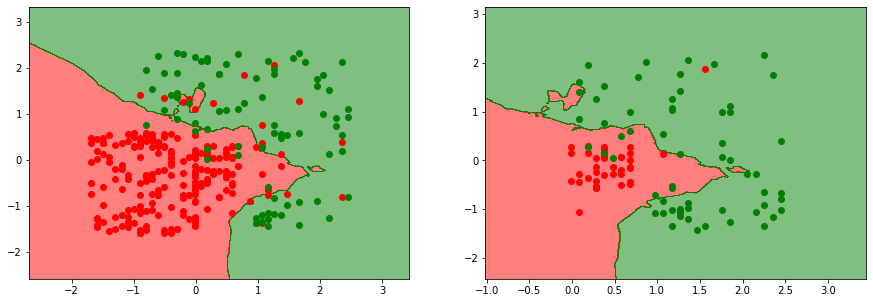

[[203  16]
 [  8  73]]
[[37  1]
 [ 9 53]]


In [11]:
score_train = []
score_test = []
for i in range(3,10,2):
    if (i%2==1):
        classifier = KNeighborsClassifier(n_neighbors = i)
        classifier.fit(X_train, Y_train)
        
        plt.figure(figsize=(15,5))
        
        plt.subplot(1,2,1)
        VisualizingResult(classifier, X_train)
        VisualizingDataset(X_train, Y_train)
        
        plt.subplot(1,2,2)
        VisualizingResult(classifier, X_test)
        VisualizingDataset(X_test, Y_test)
        plt.savefig("TrainTest"+str(i)+".png",dpi=120)
        plt.show()
        
        cm = confusion_matrix(Y_train, classifier.predict(X_train))
        score_train.append((float)(cm[0][1]+cm[1][0])/300)
        print(cm)
        cm = confusion_matrix(Y_test, classifier.predict(X_test))
        score_test.append((float)(cm[0][1]+cm[1][0])/100)
        print(cm)
        
        # save the model to disk
    
        filename = 'finalized_model'+str(i)+'.sav'
        joblib.dump(classifier, filename)
        loaded_model = joblib.load(filename)
        result = loaded_model.score(X_test, Y_test)

In [12]:
model = np.array([3,5,7,9])
df_compare = pd.DataFrame([model,score_train,score_test]).T
df_compare.columns = ["model", "train", "test"]
df_compare

,model,train,test
0,3.0,0.073333,0.15
1,5.0,0.076667,0.13
2,7.0,0.083333,0.11
3,9.0,0.080000,0.10


In [13]:
def compare(i_example):
    x = X_test[i_example : i_example + 1]
    y = Y_test[i_example]
    y_pred = classifier.predict(x)
    x_inv = SC.inverse_transform(x)
    print(x_inv, y, y_pred)

In [14]:
for i in range(7, 12):
    compare(i)

[[4.70e+01 1.13e+05]] 1 [1]
[[3.60e+01 1.25e+05]] 1 [1]
[[3.8e+01 5.0e+04]] 0 [0]
[[4.2e+01 7.0e+04]] 0 [0]
[[3.9e+01 9.6e+04]] 1 [1]
